In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from geojson import Feature, Point, FeatureCollection
from geopandas.tools import sjoin
from sklearn.cluster import KMeans
import numpy as np
from folium import plugins
import folium

In [53]:

data = gpd.read_file('population_HCMC/population_shapefile/Population_District_Level.shp')

In [54]:
data = data.to_crs(4326)

In [55]:
data_click = gpd.read_file('click_data.json/click_data.json')

In [56]:
data["Density_2019"] = data["Pop_2019"] / data["Shape_Area"]
data["Density_2017"] = data["Pop_2017"] / data["Shape_Area"]
data["Density_Change"] = data["Density_2019"] / data["Density_2017"]
#Top 5 quận huyện có tốc độ tăng MẬT ĐỘ dân số nhanh nhất (Dùng dữ liệu 2019  và 2017)
data_top5 = data.sort_values('Density_Change', ascending=False).head()

In [57]:
#Spatial join
click_top5 = gpd.sjoin(data_click, data_top5)

In [58]:
click_top5 = click_top5.reset_index()

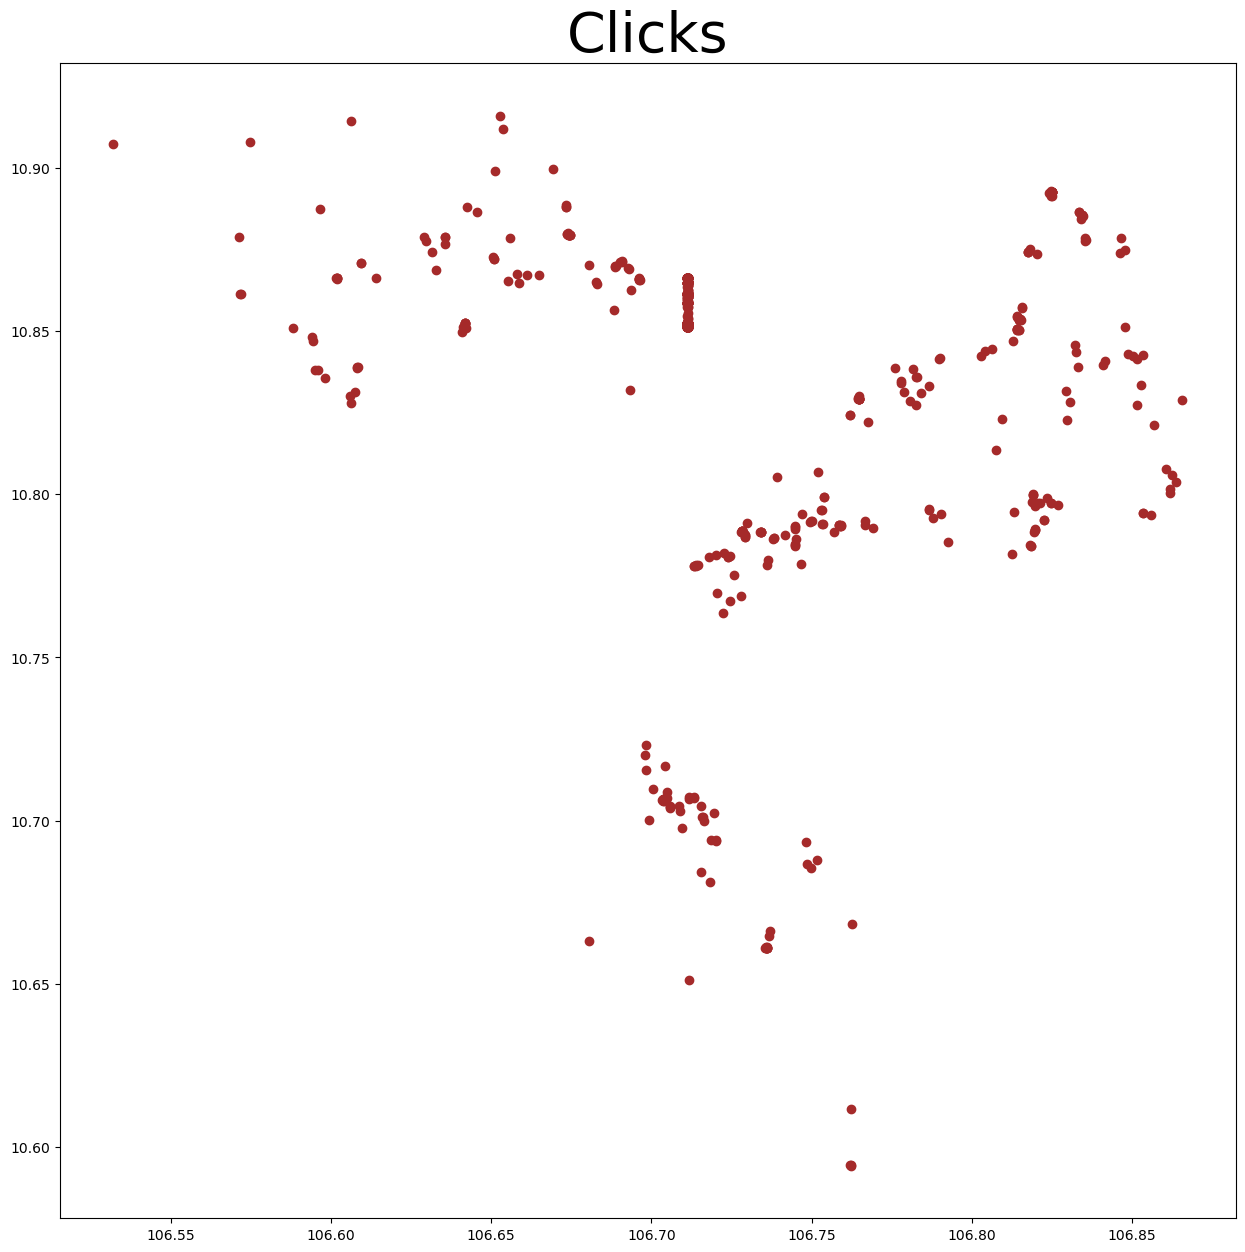

In [59]:
f, ax = plt.subplots(1, figsize=(20, 15))
ax.set_title("Clicks", fontsize=40)

click_top5.plot(ax=ax, color='brown')
plt.show()

In [60]:

a = list(click_top5['geometry'].apply(lambda p: p.x))
b = list(click_top5['geometry'].apply(lambda p: p.y))
X=np.column_stack((a,b))

In [61]:
#KMean cho top 5 quận huyện này. Lấy K = 20
kmeans = KMeans(n_clusters = 20, random_state = 0)
y_predict = kmeans.fit_predict(X)

C:\Users\84981\anaconda3\envs\CS116\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [62]:
y_predict

array([ 4,  4,  8, 12, 19, 19,  4, 12, 19, 19,  4, 19, 12, 19, 12, 17, 19,
        8, 19, 12, 19, 12,  8, 12, 12, 19, 19, 19,  6,  3, 18,  6, 18,  2,
        2, 10, 18,  2,  9,  6,  6, 10, 10,  2, 18,  3, 15,  6, 10,  6, 10,
        3, 18,  6,  9,  6,  6,  2, 10, 15, 10, 10, 18,  2,  2, 10,  6, 18,
        6,  2,  9, 18,  6, 18, 10,  9,  6,  2,  3, 18, 15, 10, 10, 10, 15,
        2,  6,  6,  2,  2,  9,  2,  2,  9, 18,  9,  2, 15, 18,  2,  2, 18,
        6, 10,  6,  2, 18, 18, 10,  2, 15,  2,  9, 15,  9, 18, 10,  2,  6,
        6, 15,  6,  9,  2, 18,  2,  2,  9, 18,  9, 18,  2, 10,  9,  9,  2,
       18, 18,  6, 15, 10,  6, 18, 10, 10,  2, 10,  2,  6,  2,  3,  6,  2,
        9, 18,  2,  2,  6, 10,  9,  6, 14,  1,  7,  1,  1,  7,  1,  1,  7,
       14,  1,  7,  1, 14,  1,  7,  7,  1,  1,  1,  1,  7,  1,  1,  7,  1,
        7,  1,  1,  7,  1,  7,  7,  1,  1,  1,  1,  7,  7,  1,  7,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  7,  7,  1,  1,
        1,  1,  1,  1,  1

In [63]:
click_top5['Index'] = click_top5.index
click_top5

,index,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,...,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Density_2019,Density_2017,Density_Change,Index
0,126,1,POINT (106.57481 10.90807),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,0
1,525,1,POINT (106.57148 10.87880),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,1
2,7264,1,POINT (106.65113 10.89893),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,2
3,7964,1,POINT (106.60845 10.83907),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,3
4,12190,1,POINT (106.61414 10.86641),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,80506,1,POINT (106.72819 10.78848),17,District 2,769,District,147490.0,140621.0,137749.0,...,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,895
896,80913,1,POINT (106.75390 10.79923),17,District 2,769,District,147490.0,140621.0,137749.0,...,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,896
897,80925,1,POINT (106.75892 10.79026),17,District 2,769,District,147490.0,140621.0,137749.0,...,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,897
898,82068,1,POINT (106.74674 10.77871),17,District 2,769,District,147490.0,140621.0,137749.0,...,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,898


In [64]:
k = gpd.GeoDataFrame(y_predict, columns=['Label'])
k['Index'] = k.index
k

,Label,Index
0,4,0
1,4,1
2,8,2
3,12,3
4,19,4
...,...,...
895,11,895
896,5,896
897,5,897
898,5,898


In [65]:
click_top5_clustered = pd.merge(click_top5, k, on='Index')
click_top5_clustered

,index,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,...,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Density_2019,Density_2017,Density_Change,Index,Label
0,126,1,POINT (106.57481 10.90807),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,0,4
1,525,1,POINT (106.57148 10.87880),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,1,4
2,7264,1,POINT (106.65113 10.89893),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,2,8
3,7964,1,POINT (106.60845 10.83907),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,3,12
4,12190,1,POINT (106.61414 10.86641),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,80506,1,POINT (106.72819 10.78848),17,District 2,769,District,147490.0,140621.0,137749.0,...,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,895,11
896,80913,1,POINT (106.75390 10.79923),17,District 2,769,District,147490.0,140621.0,137749.0,...,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,896,5
897,80925,1,POINT (106.75892 10.79026),17,District 2,769,District,147490.0,140621.0,137749.0,...,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,897,5
898,82068,1,POINT (106.74674 10.77871),17,District 2,769,District,147490.0,140621.0,137749.0,...,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,898,5


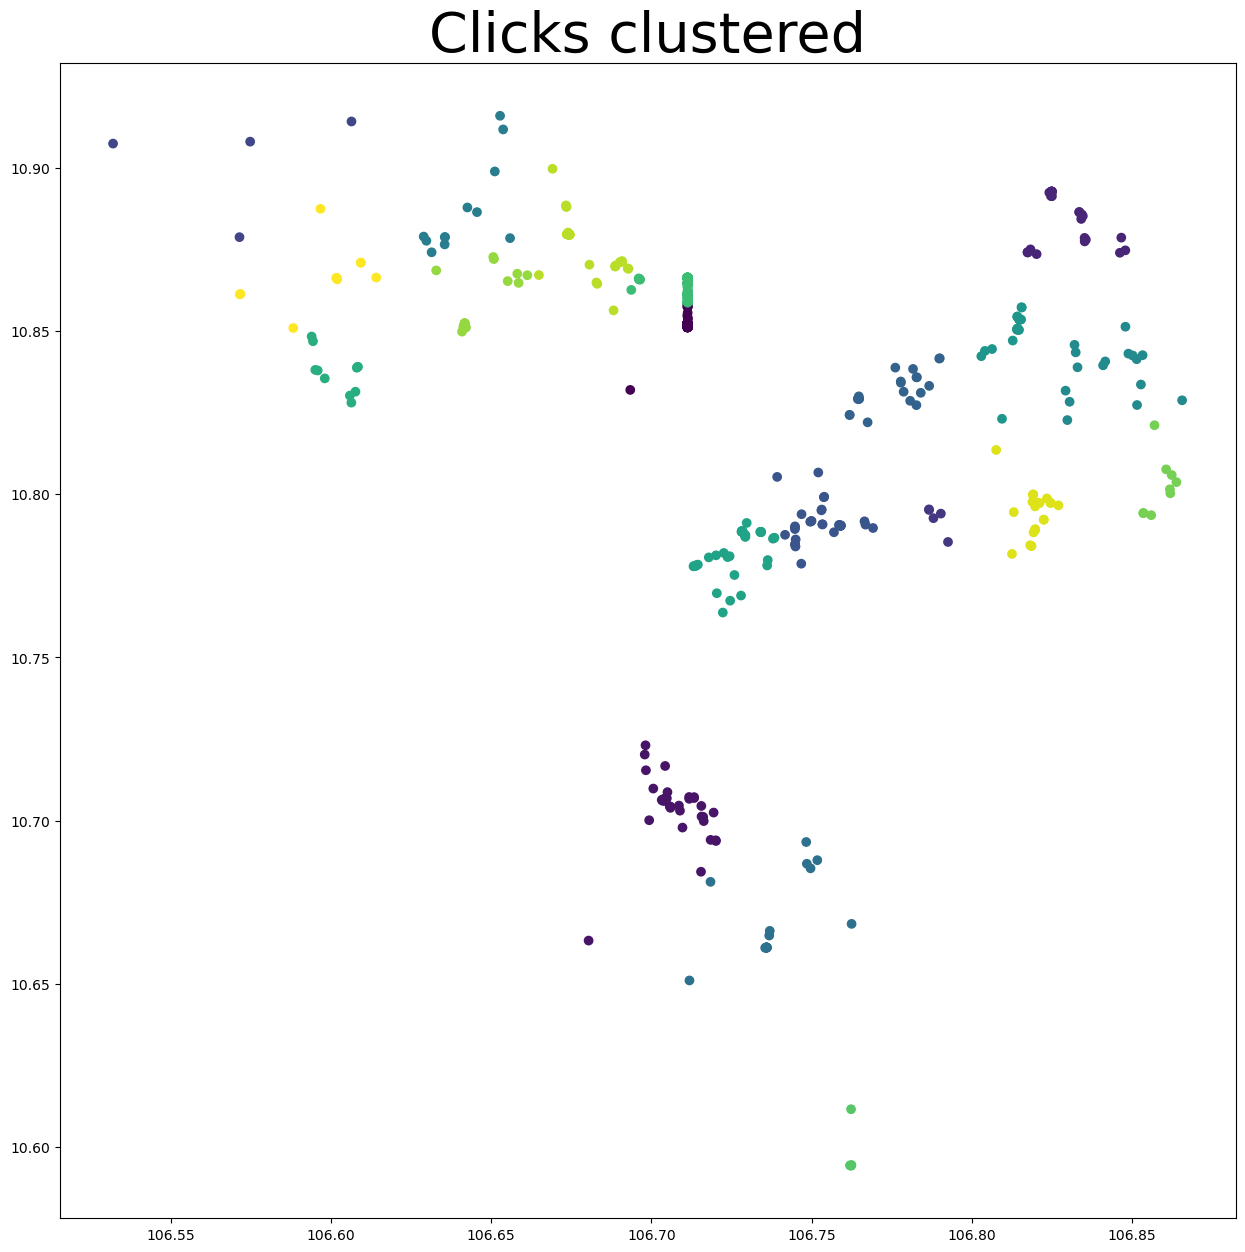

In [66]:
#Plot theo cụm
f, ax = plt.subplots(1, figsize=(20, 15))
ax.set_title("Clicks clustered", fontsize=40)
click_top5_clustered.plot(column='Label', ax=ax)
plt.show()

In [67]:
click_top5_clustered.groupby(['Label'])['Label'].count()


Label
0     355
1      47
2      32
3       5
4       4
5      32
6      26
7      19
8      12
9      16
10     22
11     42
12     11
13    185
14      4
15      9
16     16
17     28
18     23
19     12
Name: Label, dtype: int64

In [68]:
#Tạo 1 cột là số điểm tương ứng với cụm mà điểm đó thuộc về
click_top5_clustered['Counts'] = click_top5_clustered.groupby(['Label'])['Label'].transform('count')
click_top5_clustered

,index,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,...,Den_2017,Den_2019,Shape_Leng,Shape_Area,Density_2019,Density_2017,Density_Change,Index,Label,Counts
0,126,1,POINT (106.57481 10.90807),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,0,4,4
1,525,1,POINT (106.57148 10.87880),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,1,4,4
2,7264,1,POINT (106.65113 10.89893),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,2,8,12
3,7964,1,POINT (106.60845 10.83907),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,3,12,11
4,12190,1,POINT (106.61414 10.86641),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,...,4085.48,4966.47,65955.793966,1.091744e+08,0.004967,0.004086,1.215639,4,19,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,80506,1,POINT (106.72819 10.78848),17,District 2,769,District,147490.0,140621.0,137749.0,...,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,895,11,42
896,80913,1,POINT (106.75390 10.79923),17,District 2,769,District,147490.0,140621.0,137749.0,...,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,896,5,32
897,80925,1,POINT (106.75892 10.79026),17,District 2,769,District,147490.0,140621.0,137749.0,...,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,897,5,32
898,82068,1,POINT (106.74674 10.77871),17,District 2,769,District,147490.0,140621.0,137749.0,...,3243.16,3609.98,39592.970451,4.993869e+07,0.003610,0.003243,1.113104,898,5,32


In [ ]:
#Lưu 1 cụm điểm nhiều nhất trong các quận huyện ở Bước 5 (nhận thấy có nhiều điểm thuộc cụm 0 nhất)
max_clustered = click_top5_clustered[click_top5_clustered.Label == 0]
max_clustered

In [ ]:
#Số lượng các điểm click của người dùng trong 5 quận/huyện hot nhất
len(click_top5_clustered)

In [ ]:
#Tính trọng số để tạo heatmap
click_top5_clustered['Weight'] = click_top5_clustered['Counts'] / len(click_top5_clustered)
click_top5_clustered

In [ ]:
data.plot(figsize=(6, 6))
plt.show()

In [ ]:
m = folium.Map(location=[10.8, 106.7], zoom_start=11, tiles='CartoDB positron')
m

In [ ]:
for _, r in data.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'green'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
#5 quận huyện có tốc độ tăng MẬT ĐỘ dân số nhanh nhất (Dùng dữ liệu 2019  và 2017)

for _, r in data_top5.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'red'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
heat_data = list(map(list, zip(click_top5_clustered["geometry"].y,
                          click_top5_clustered["geometry"].x,
                    
                         
                    )
                    ))
heat_data

In [ ]:
#Heatmap số lần click với label là trọng số
plugins.HeatMap(heat_data).add_to(m)
m